<a href="https://colab.research.google.com/github/sravani1102/machinelearning/blob/main/ml_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flower Classification using CNN**

**Import required libaries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Importing the data set**

In [ ]:
import pathlib
dataset="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset,untar=True)
data_dir=pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


**Count number of images in data set**

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


**Flowers in dataset**

In [ ]:
flower_types=os.listdir(data_dir)
flower_types.remove('LICENSE.txt')
print(flower_types)

['tulips', 'dandelion', 'sunflowers', 'daisy', 'roses']


**Flowers**

Rose


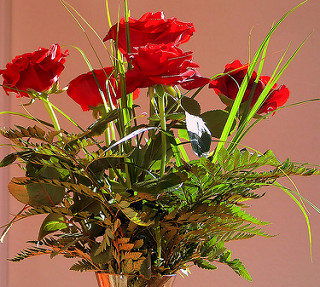

In [ ]:
print("Rose")
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

Daisy


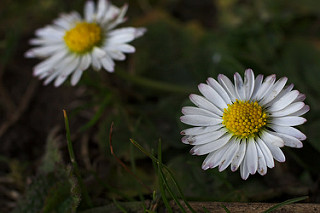

In [ ]:
print("Daisy")
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[3]))

Tulips


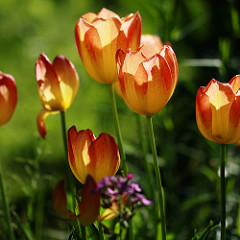

In [ ]:
print("Tulips")
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

Dandelion


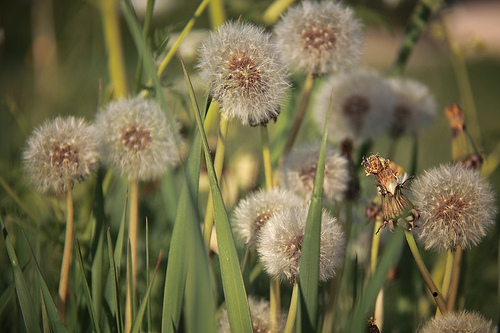

In [ ]:
print("Dandelion")
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[1]))

Sun Flowers


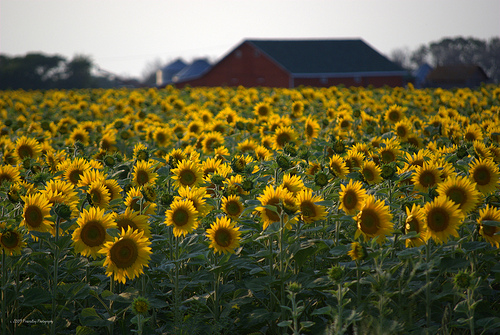

In [ ]:
print("Sun Flowers")
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[2]))

**Resize the images in dataset**

In [ ]:
batchsize=32
img_height=180
img_width=180

**Classification of data**

In [ ]:
train=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                     validation_split=0.2,
                                                     subset="training",
                                                     seed=123,
                                                     image_size=(img_height,img_width),
                                                     batch_size=batchsize)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
test=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    validation_split=0.2,
                                                    subset="validation",
                                                    seed=123,
                                                    image_size=(img_height,img_width),
                                                    batch_size=batchsize)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names=train.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Sample Images of training dataset**

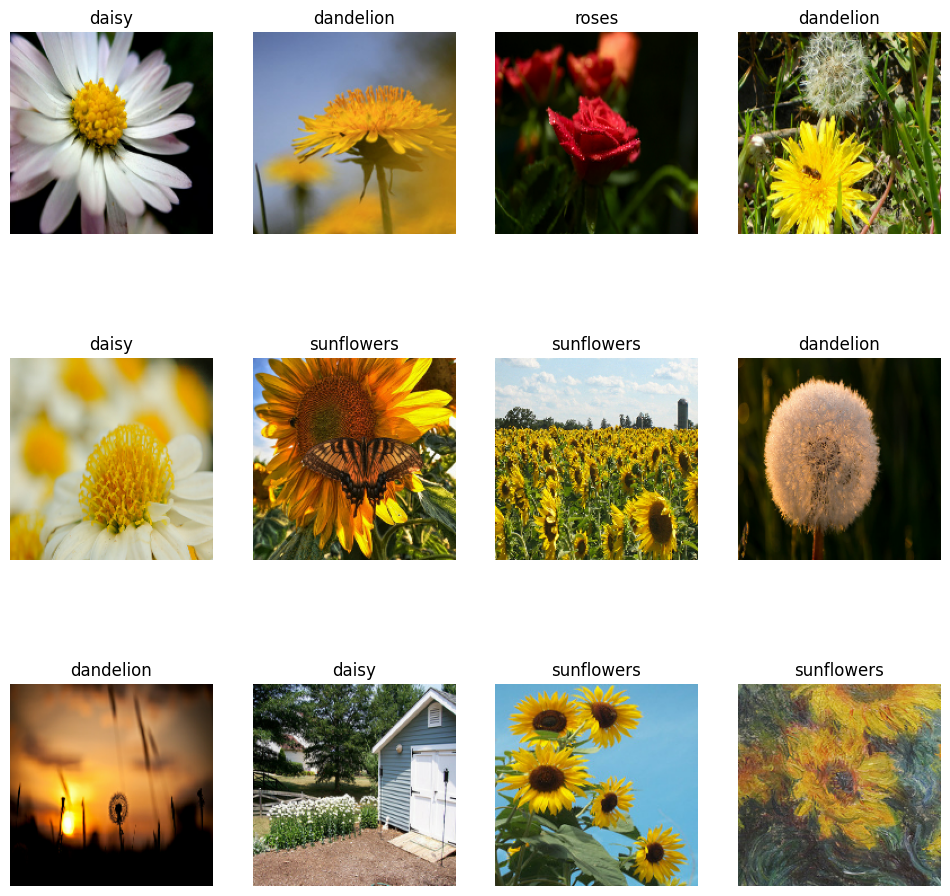

In [ ]:
plt.figure(figsize=(12,12))
for images,labels in train.take(1):
  for i in range(12):
    a=plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
n=len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,
  input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=15
history=model.fit(train,
                  validation_data=test,
                  epochs=epochs)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 12s 80ms/step - loss: 1.4397 - accuracy: 0.4043 - val_loss: 1.1340 - val_accuracy: 0.5463
Epoch 2/15
92/92 [==============================] - 7s 70ms/step - loss: 1.0103 - accuracy: 0.6025 - val_loss: 1.0308 - val_accuracy: 0.5872
Epoch 3/15
92/92 [==============================] - 7s 74ms/step - loss: 0.8220 - accuracy: 0.6921 - val_loss: 1.0629 - val_accuracy: 0.5804
Epoch 4/15
92/92 [==============================] - 6s 59ms/step - loss: 0.5801 - accuracy: 0.7820 - val_loss: 1.0306 - val_accuracy: 0.6267
Epoch 5/15
92/92 [==============================] - 6s 66ms/step - loss: 0.3744 - accuracy: 0.8699 - val_loss: 1.2636 - val_accuracy: 0.6172
Epoch 6/15
92/92 [==============================] - 6s 57ms/step - loss: 0.2576 - accuracy: 0.9029 - val_loss: 1.3921 - val_accuracy: 0.6158
Epoch 7/15
92/92 [==============================] - 7s 69ms/step - loss: 0.1281 - accuracy: 0.9608 - val_loss: 1.5775 - val_accuracy: 0.6390
Epoch 8/15
92/92 [=====

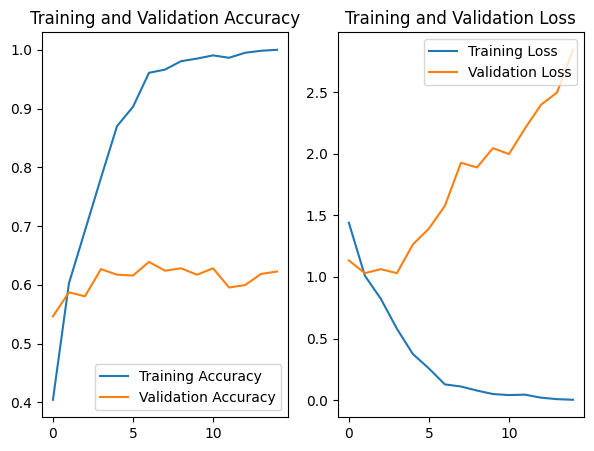

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
epochs=30
history=model.fit(train,
                  validation_data=test,
                  epochs=epochs)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 6s 63ms/step - loss: 1.5097 - accuracy: 0.3787 - val_loss: 1.2207 - val_accuracy: 0.4986
Epoch 2/30
92/92 [==============================] - 6s 60ms/step - loss: 1.0709 - accuracy: 0.5681 - val_loss: 0.9933 - val_accuracy: 0.5926
Epoch 3/30
92/92 [==============================] - 6s 61ms/step - loss: 0.9015 - accuracy: 0.6465 - val_loss: 0.9674 - val_accuracy: 0.6144
Epoch 4/30
92/92 [==============================] - 6s 61ms/step - loss: 0.7376 - accuracy: 0.7170 - val_loss: 1.0871 - val_accuracy: 0.5817
Epoch 5/30
92/92 [==============================] - 6s 62ms/step - loss: 0.5364 - accuracy: 0.8082 - val_loss: 1.0216 - val_accuracy: 0.6444
Epoch 6/30
92/92 [==============================] - 6s 60ms/step - loss: 0.3850 - accuracy: 0.8569 - val_loss: 1.0791 - val_accuracy: 0.6621
Epoch 7/30
92/92 [==============================] - 6s 61ms/step - loss: 0.2384 - accuracy: 0.9217 - val_loss: 1.5241 - val_accuracy: 0.6117
Epoch 8/30
92/92 [======

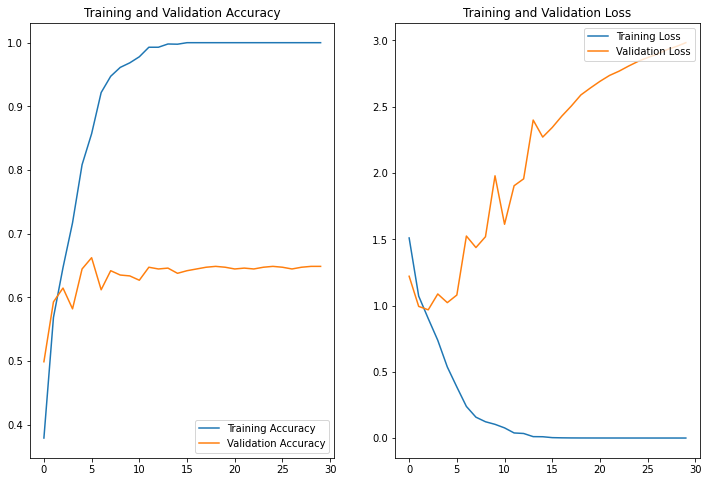

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Data Augumentation and Dropout** to reduce the overfitting

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

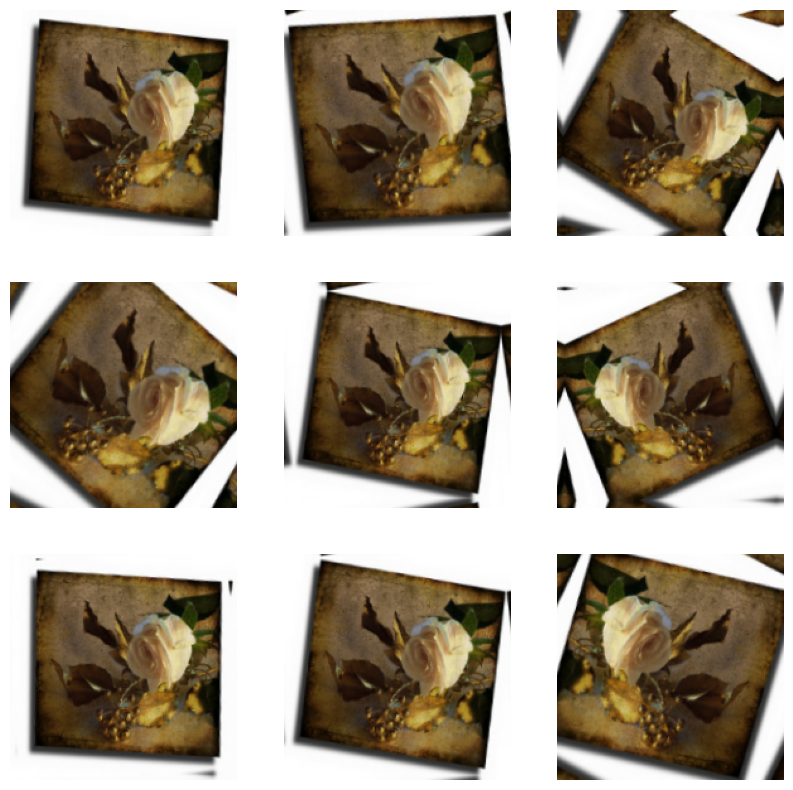

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
n=len(class_names)
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=30
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 16s 86ms/step - loss: 1.3370 - accuracy: 0.4179 - val_loss: 1.1230 - val_accuracy: 0.5518
Epoch 2/30
92/92 [==============================] - 6s 65ms/step - loss: 1.0544 - accuracy: 0.5756 - val_loss: 1.1292 - val_accuracy: 0.5518
Epoch 3/30
92/92 [==============================] - 8s 82ms/step - loss: 0.9764 - accuracy: 0.6131 - val_loss: 0.8853 - val_accuracy: 0.6608
Epoch 4/30
92/92 [==============================] - 6s 63ms/step - loss: 0.8664 - accuracy: 0.6666 - val_loss: 0.8532 - val_accuracy: 0.6703
Epoch 5/30
92/92 [==============================] - 8s 82ms/step - loss: 0.8221 - accuracy: 0.6860 - val_loss: 0.7759 - val_accuracy: 0.6866
Epoch 6/30
92/92 [==============================] - 8s 80ms/step - loss: 0.7720 - accuracy: 0.6965 - val_loss: 0.8194 - val_accuracy: 0.6866
Epoch 7/30
92/92 [==============================] - 7s 70ms/step - loss: 0.7410 - accuracy: 0.7146 - val_loss: 0.8344 - val_accuracy: 0.6798
Epoch 8/30
9

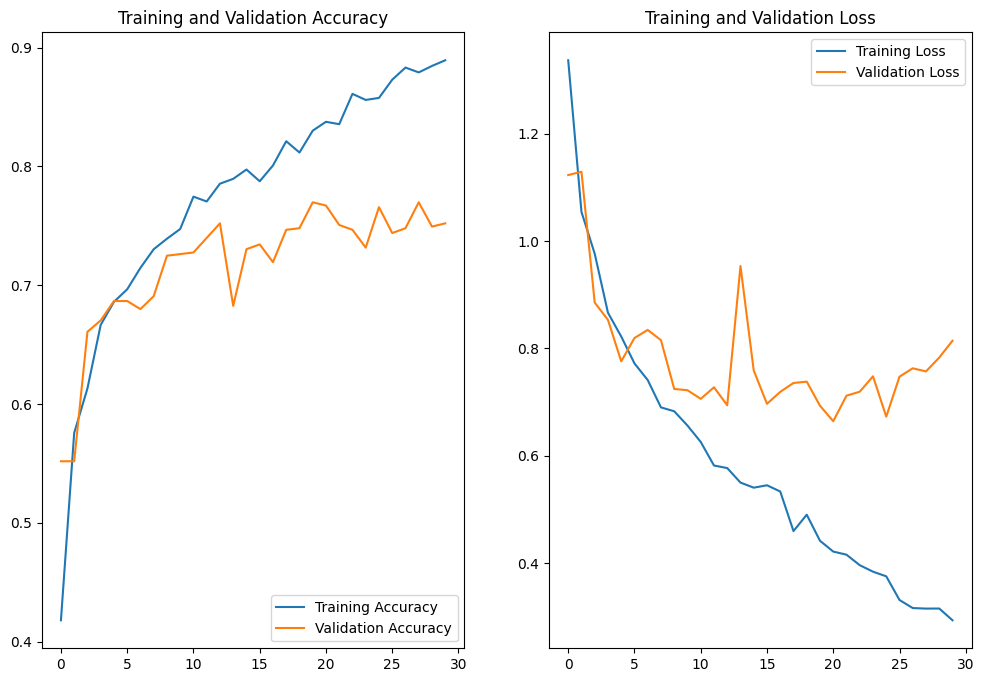

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**predict input images**

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1*180*180*3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]:float(prediction[i]) for i in range(5)}

In [ ]:
!pip install gradio

In [ ]:
import gradio as g

In [ ]:
image = g.Image()
label = g.Label(num_top_classes=5)

g.Interface(fn=predict_input_image, inputs=image,outputs=label).launch(debug='True')

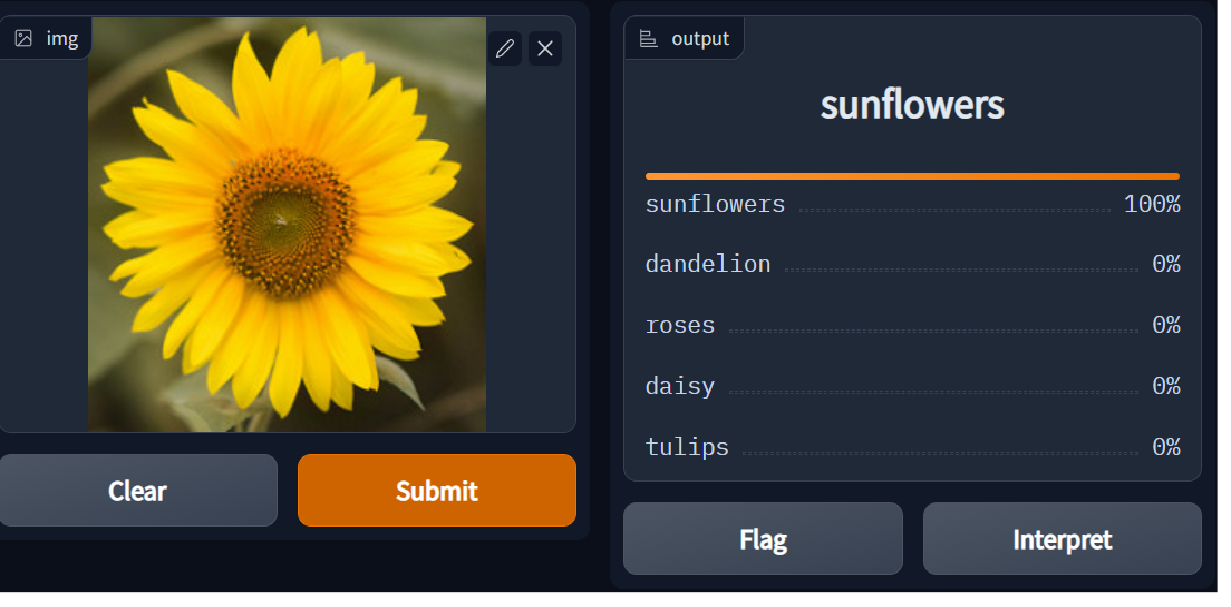